# Project

*Davide Gerosa (Milano-Bicocca)*

This course is based on previous work by many people. See [here](https://github.com/dgerosa/machinelearning4physics_bicocca_2024) for credits.

---


Let's finish the class with a longer project. This is far more challenging that what we've done so far (but that's also an opportunity to be creative). Good luck!


# Exam exercise!

## The expansion of the Universe

Measuring distances in astronomy is *very* complicated. Is that star brigt and far or dim and close? If you think about it, measuring a distance requires going from here to there (say with a ruler). Obviously we can't do it in astronomy. 

If a light source moves away from you, the light emitted is observed at lower frequency (i.e. it is redshifted) That's called Doppler effect (same thing that happens when an ambulance is approaching/receding). So measuring a redshift $z$ is equivalent to measuring the velocity of the source. 

How does the distance to the object depends on their redshift? **This relation encodes the secrets of the large-scale structure of the Universe**. Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! 
 
The key point is to measure the apparent luminostiy of a source (i.e. how much light reaches my telescope) and then find some other quantity that is related to the intrinsic luminosity (i.e. how much light has been emitted). From the two, one can obtain the distance. But how do you measure the absolute luminosity without going there next to the stars?  

In the 1920's Hubble discovered that variability period of some oscillating stars is related to their luminosity. And found this ([Hubble 1929](https://www.pnas.org/doi/10.1073/pnas.15.3.168)]

![](https://www.e-education.psu.edu/astro801/sites/www.e-education.psu.edu.astro801/files/image/hubbleslaw_plot.jpg)


That is, things at larger distances are moving faster. This means the Universe is expanding!

Variable stars are too hard to see when they are very far. At high redshifts, cosmology is done with a specific kind of exploding stars called Type Ia Supernovae. These are standard (or better, standardizable) candles, i.e. they have the same intrisic luminosity (and that's because of how they form). So if I see a Type Ia supernova and measure its flux, I can infer the distance. 


![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Progenitor_IA_supernova.svg/1280px-Progenitor_IA_supernova.svg.png)


When they started using Type 1A Supernova for cosmology, they found another mindblowing surprise!

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

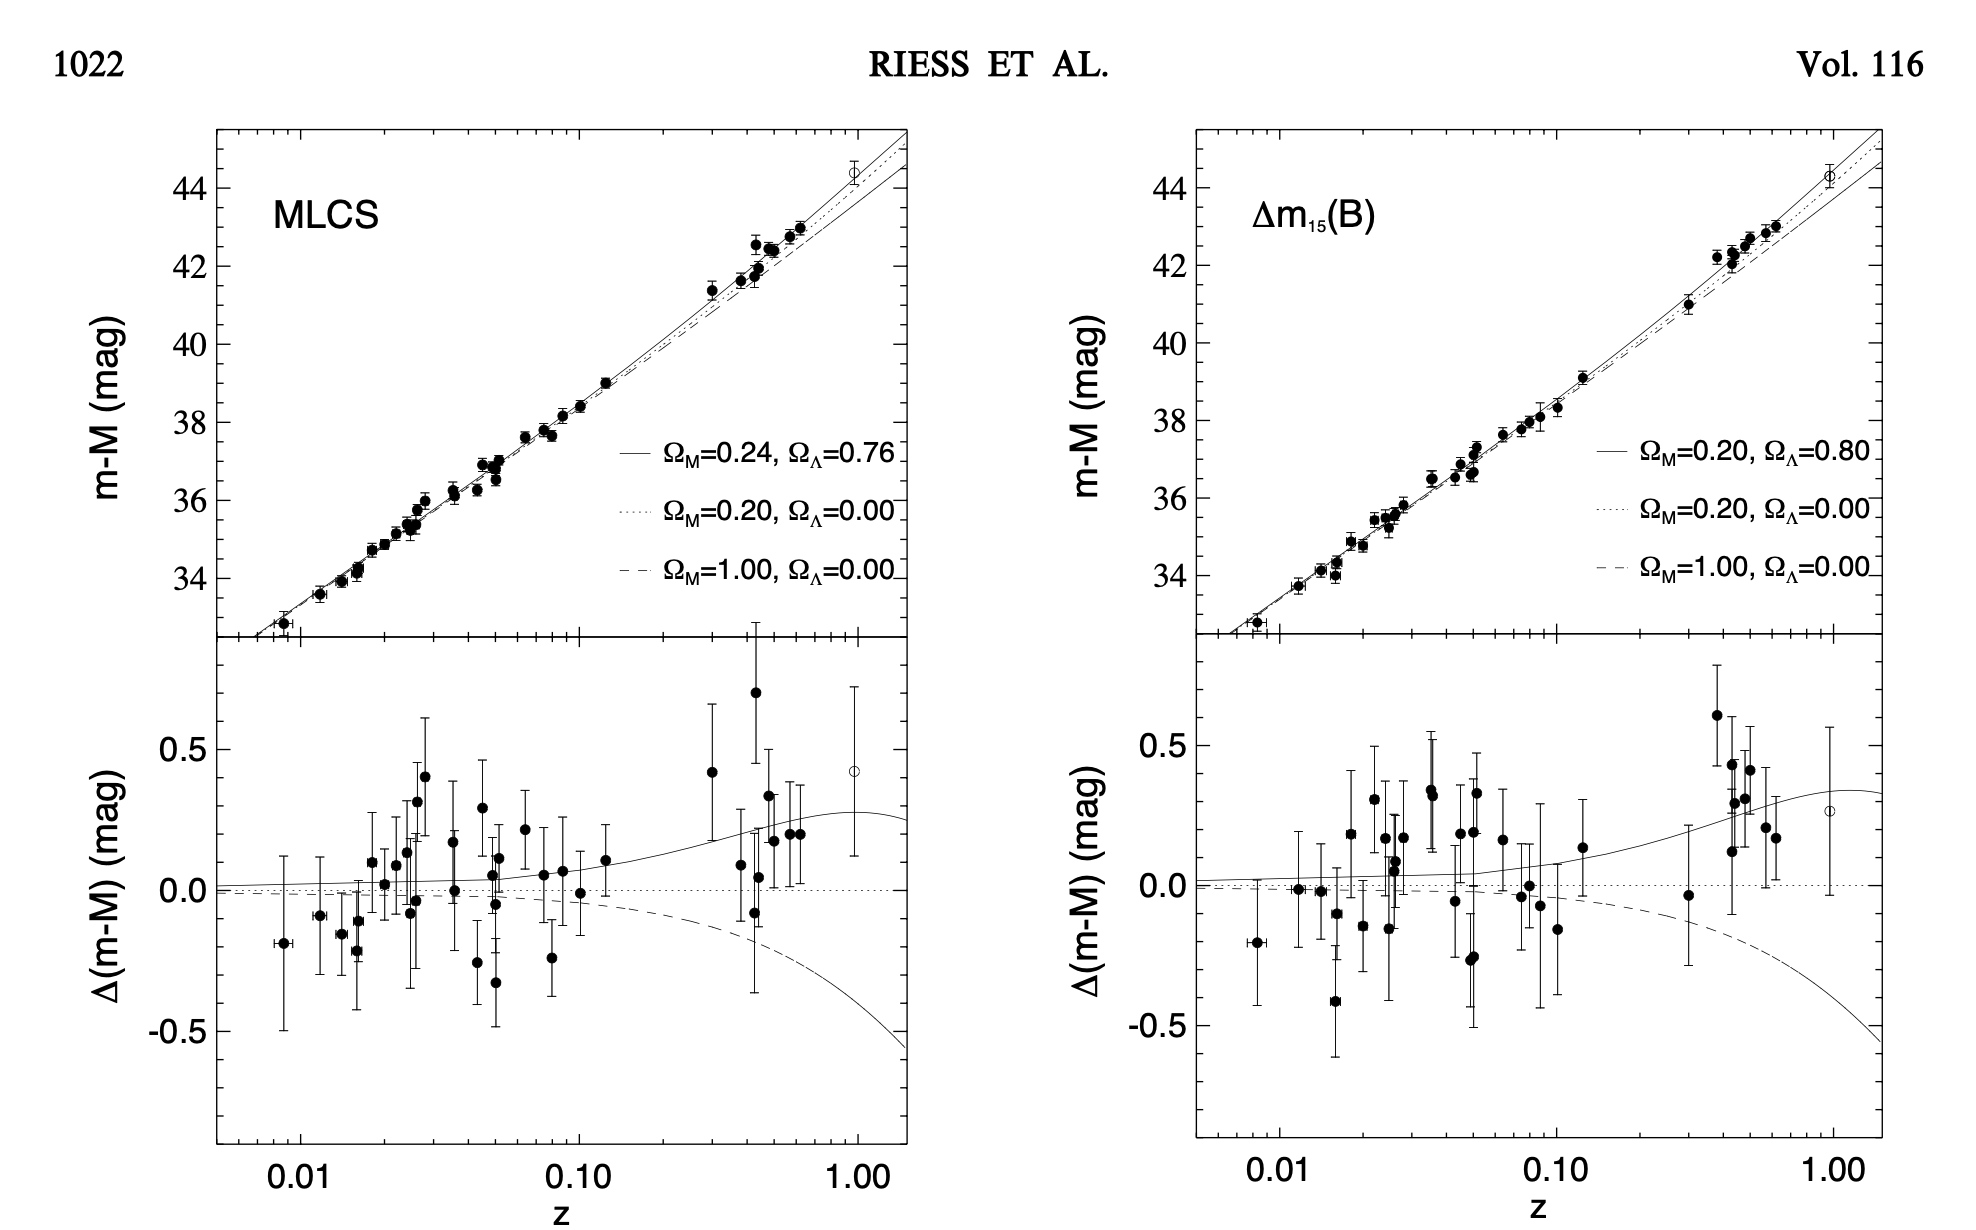

The linear feature is the expansion of the Universe (Hubble's constant) while the non-linearity at high redshift implies that the Universe is not only expanding, but it's accelerating! I.e. the expansion in the past was slower than the expansion today. We have absolutely no idea what this is, as so they called it **dark energy**. 


The quantity shown in that plot is called distance modulus (ah! the astronomers...)

$$
\mu =m - M = 5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

where $d_L$ is the distance.


The underlying theory is called [$\Lambda$CDM](https://en.wikipedia.org/wiki/Lambda-CDM_model) and predict that the Universe is made of ordinary matter (stars, galaxies, etc), dark matter, and dark energy.

In $\Lambda$CDM, the distance modulus is given by (see e.g. [Hogg 2010](https://arxiv.org/abs/astro-ph/9905116)):

$$\mu = 5 \log \left( \frac{c/H_0} {10 {\rm pc}}(1+z)\int_0^z \frac{dz'}{\sqrt{\Omega_m (1+z^3)+\Omega_\Lambda}} \right) $$

where $z$ is the redshift.

The parameters of the model are
- $H_0$, the Hubble constant
- $\Omega_m$ the density of dark matter in the Universe
- $\Omega_\Lambda$ the density of dark energy in the Universe
- (the density of ordinary matter is so small that can be safely neglected). 
- (we are also neglecting the energy of photons, i.e. light)

The [geometry of the universe](https://en.wikipedia.org/wiki/Shape_of_the_universe) is encoded in the Omegas. For instance a flat Universe satisfies $\Omega_m+\Omega_\Lambda=1$.

A note on the units:

- $c$ is the expression above is the speed of light 
- pc in the expression above stands for parsec with 1 pc = 3.086 x 10^16 meters.
- Astronomers like weird units. The Hubble constant has unit of 1/s but it's typically quoted in (km/s)/Mpc. 
- The Omegas are dimensionless.

### Dataset

These are some (synthetic but very realistic) supernova data

500


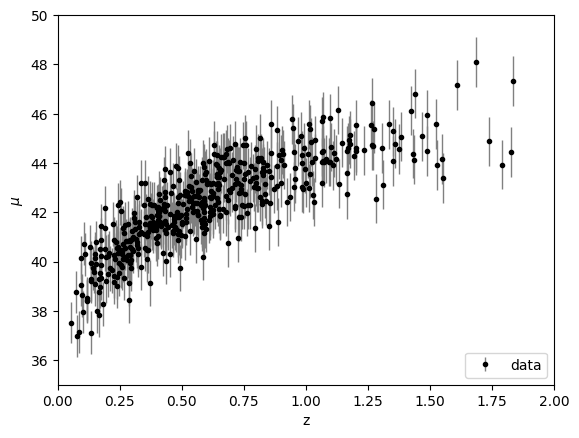

In [1]:
from pylab import plt
import numpy as np

z_sample,mu_sample,dmu=np.loadtxt('../datasets/supernovae.txt').T

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

print(len(z_sample))

Your task is to measure the properties of the Universe $H_0$, $\Omega_m$ and $\Omega_\Lambda$. As you see, this is a very non-linear model! 

### Steps

You're free to do what you want. Explore! Here is some guidance:

0. Use both MCMC and nested sampling.
1. First you'll need to evaluate the $\mu$ predictions. Implement a numerical integrator for that expression. You can check your result with that given by the python module [astropy](https://www.astropy.org/).
2. Fit a simpler model first. Assume dark energy doesn't exist $\Omega_\Lambda=0$ and that the geometry of the Universe is flat $\Omega_m=1$. This is a one-parameter model. Sample the posterior distribution of $H_0$.
3. Then let's consider a two-parameter model where you estimate only $H_0$ and $\Omega_m$ while imposing $\Omega_\Lambda+\Omega_m=1$ (i.e the Universe is flat but I search for dark energy). 
    - How well can you measure $H_0$ compared to the simpler case above?
    - Are $H_0$ and $\Omega_m$ correlated?
4. Then let's fit the full 3D model for $H_0$, $\Omega_m$ and $\Omega_\Lambda$
    - What's the Bayes factor that the Universe is flat?
    - What's the Bayes factor that Dark Energy exists?
5. The European Space Agency is considering new cosmology-related space mission. They ask you to figure out what science you can do with 10 times more measurement compared to what you have right now. That is: you want to clone your data.  
    - Provide a cloned sample of these data. 
    - You'll need a density estimator in $z$.
    - ...and then sample your fitted model to obtain faithful mock measurements of $\mu$ 
    
